<a href="https://colab.research.google.com/github/Sneha-mav/Iris-Flower-Classification/blob/main/Iris_flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>1. Load Dataset & Import Libraries</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

In [6]:
iris_df=sns.load_dataset('iris')

<h1>2. Data Understanding </h1>

In [ ]:
iris_df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
99,5.7,2.8,4.1,1.3,versicolor
28,5.2,3.4,1.4,0.2,setosa
81,5.5,2.4,3.7,1.0,versicolor
130,7.4,2.8,6.1,1.9,virginica
78,6.0,2.9,4.5,1.5,versicolor


In [ ]:
print("No. of rows: ",iris_df.shape[0])
print("No. of columns: ",iris_df.shape[1])

No. of rows:  150
No. of columns:  5


In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris_df=iris_df.drop_duplicates()

In [ ]:
iris_df.shape

(149, 5)

<h1>Data Vizualization</h1>

<h2>Chart 1:KDE plots</h2>

Plotting KDE (Kernel Density Estimation) plots in the organized 4x4 grid format.


- **Cross-feature comparison**: Each row shows how one feature varies across different species - Example: Quickly see that Setosa's petal measurements are distinctly smaller than other species

- Shows **skewness** and **kurtosis** of each feature per species - Example: Virginica's petal_length shows a wider distribution than other species

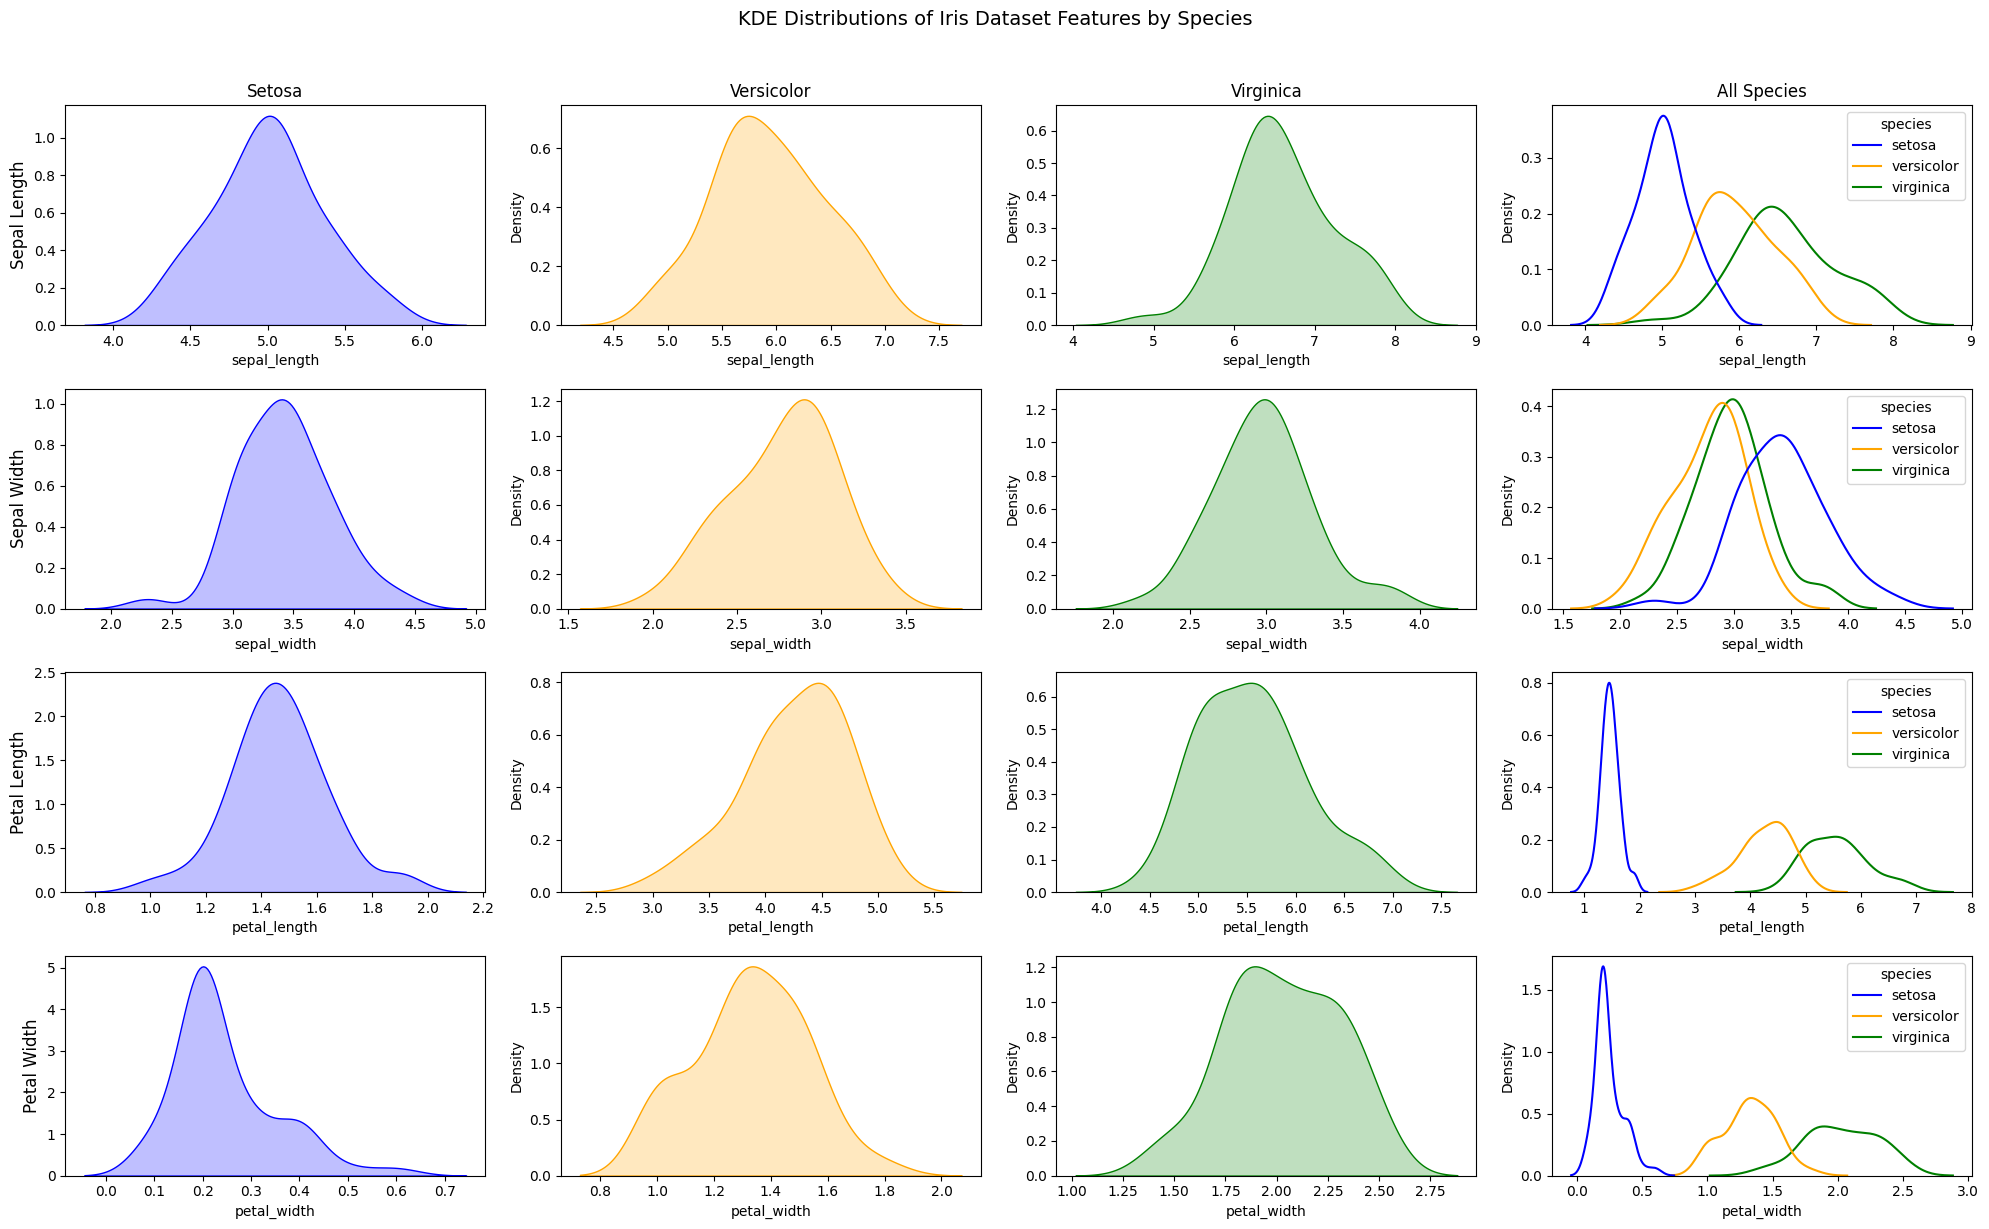

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(20, 12))
species_list = ['setosa', 'versicolor', 'virginica']
colors = ['blue', 'orange', 'green']
features=['sepal_length','sepal_width','petal_length','petal_width']

for row, feature in enumerate(features):
    # Individual species
    for col, species in enumerate(species_list):
        species_df = iris_df[iris_df['species'] == species]
        sns.kdeplot(
            data=species_df,
            x=feature,
            fill=True,
            color=colors[col],
            ax=axes[row, col]
        )
        if row == 0:  # Only show species name in top row
            axes[row, col].set_title(species.capitalize())

    # All species combined
    sns.kdeplot(
        data=iris_df,
        x=feature,
        hue='species',
        palette=colors,
        fill=False,
        ax=axes[row, 3]
    )
    if row == 0:
      axes[row, 3].set_title('All Species')
    axes[row, 0].set_ylabel(feature.replace('_', ' ').title(), rotation=90, size=12)
plt.suptitle('KDE Distributions of Iris Dataset Features by Species', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

<h2>Feature Correlation Matrix</h2>

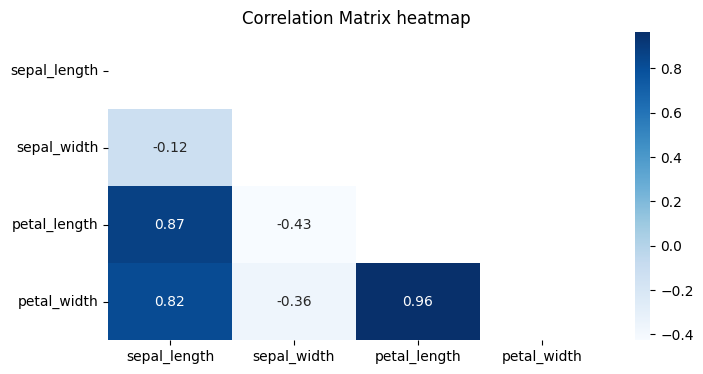

In [ ]:
corr_matrix = iris_df.drop('species', axis=1).corr()
plt.figure(figsize=(8, 4))
mask = np.triu(np.ones_like(corr_matrix))
sns.heatmap(corr_matrix, annot=True, cmap='Blues',mask=mask)
plt.title('Correlation Matrix heatmap')
plt.show()

<h1>4. Data Pre-Processing</h1>

In [8]:
label_en=LabelEncoder()
iris_df['species']=label_en.fit_transform(iris_df['species'])

In [ ]:
iris_df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
35,5.0,3.2,1.2,0.2,0
76,6.8,2.8,4.8,1.4,1
9,4.9,3.1,1.5,0.1,0
121,5.6,2.8,4.9,2.0,2
85,6.0,3.4,4.5,1.6,1


In [ ]:
iris_df['species'].unique()

array([0, 1, 2])

In [9]:
x=iris_df.drop(columns=['species'], axis=1)
y=iris_df['species']

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

<Axes: xlabel='species', ylabel='count'>

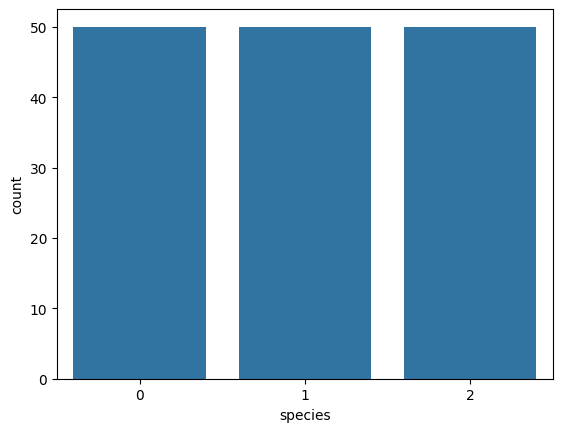

In [ ]:
sns.countplot(x='species',data=iris_df)

<h1>Model Implementation Generalised</h1>

In [11]:
def model_implementation(model,x_train,x_test,y_train,y_test):

  model.fit(x_train,y_train)

  y_pred_train=model.predict(x_train)
  y_pred_test=model.predict(x_test)

  # classification table
  ct_train=classification_report(y_train,y_pred_train,output_dict=True)
  ct_test=classification_report(y_test,y_pred_test,output_dict=True)

  # train data
  print("\nTraining Data Classification Table:")
  ctt_df=pd.DataFrame(ct_train).transpose()
  print(ctt_df.to_markdown())

  # test data
  print("\nTest Data Classification Table:")
  ctt_df=pd.DataFrame(ct_test).transpose()
  print(ctt_df.to_markdown())

  precision_train=ct_train["macro avg"]["precision"]
  precision_test=ct_test["macro avg"]["precision"]

  recall_train=ct_train["macro avg"]["recall"]
  recall_test=ct_test["macro avg"]["recall"]

  as_train=accuracy_score(y_train,y_pred_train)
  as_test=accuracy_score(y_test,y_pred_test)

  F1_train=ct_train["macro avg"]["f1-score"]
  F1_test=ct_test["macro avg"]["f1-score"]

  scores=[precision_train,precision_test,recall_train,recall_test,as_train,as_test,F1_train,F1_test]

  model_score=pd.DataFrame(scores,index=["Precision_train","Precision_test","Recall_train","Recall_test","AccuracyScore_train","AccuracyScore_test","F1_train","F1_test"])

  return model_score

<h2>Logistic Regression</h2>

In [12]:
lor=LogisticRegression()

In [13]:
param_lor = {'C': [100,10,1,0.1,0.01,0.001,0.0001],
              'penalty': ['l1', 'l2'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

grid_cv=GridSearchCV(lor,param_lor,cv=5)
grid_cv.fit(x_train,y_train)

best_params=grid_cv.best_params_
print("Best Parameters: ",best_params)

Best Parameters:  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [14]:
lor=LogisticRegression(C=best_params['C'],penalty=best_params['penalty'],solver=best_params['solver'])

In [15]:
lor_evaluation=model_implementation(lor,x_train,x_test,y_train,y_test)


Training Data Classification Table:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        |  40       |
| 1            |    0.975    | 0.95122  |   0.962963 |  41       |
| 2            |    0.948718 | 0.973684 |   0.961039 |  38       |
| accuracy     |    0.97479  | 0.97479  |   0.97479  |   0.97479 |
| macro avg    |    0.974573 | 0.974968 |   0.974667 | 119       |
| weighted avg |    0.975011 | 0.97479  |   0.974798 | 119       |

Test Data Classification Table:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        10 |
| 1            |           1 |        1 |          1 |         9 |
| 2            |           1 |        1 |          1 |        11 |
| accuracy     |           1 |        1 |          1 |     

In [ ]:
lor_evaluation

,0
Precision_train,0.974573
Precision_test,1.000000
Recall_train,0.974968
Recall_test,1.000000
AccuracyScore_train,0.974790
AccuracyScore_test,1.000000
F1_train,0.974667
F1_test,1.000000


<h2>Decision Tree</h2>

In [16]:
dtc=DecisionTreeClassifier()

In [17]:
params_dtc={"criterion":['gini', 'entropy', 'log_loss'],
            'max_depth' : [3,4,5,6,7,8],
            'min_samples_split' : np.arange(2,8),
        'min_samples_leaf' : np.arange(10,20)}

grid_cv=GridSearchCV(dtc,params_dtc,cv=5)
grid_cv.fit(x_train,y_train)

best_params=grid_cv.best_params_
print("Best Parameters: ",best_params)

Best Parameters:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': np.int64(10), 'min_samples_split': np.int64(2)}


In [18]:
dtc=DecisionTreeClassifier(criterion=best_params['criterion'],max_depth=best_params['max_depth'],min_samples_leaf=best_params['min_samples_leaf'],min_samples_split=best_params['min_samples_split'])

In [19]:
dtc_evaluation=model_implementation(dtc,x_train,x_test,y_train,y_test)


Training Data Classification Table:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        |  40       |
| 1            |    0.972973 | 0.878049 |   0.923077 |  41       |
| 2            |    0.880952 | 0.973684 |   0.925    |  38       |
| accuracy     |    0.94958  | 0.94958  |   0.94958  |   0.94958 |
| macro avg    |    0.951308 | 0.950578 |   0.949359 | 119       |
| weighted avg |    0.952673 | 0.94958  |   0.949548 | 119       |

Test Data Classification Table:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 10        |
| 1            |    1        | 0.888889 |   0.941176 |  9        |
| 2            |    0.916667 | 1        |   0.956522 | 11        |
| accuracy     |    0.966667 | 0.966667 |   0.966667 |  0.9

In [20]:
dtc_evaluation

,0
Precision_train,0.951308
Precision_test,0.972222
Recall_train,0.950578
Recall_test,0.962963
AccuracyScore_train,0.949580
AccuracyScore_test,0.966667
F1_train,0.949359
F1_test,0.965899


<h2>Random Forest</h2>



In [21]:
rfc=RandomForestClassifier()

params_rfc={"n_estimators":[10,50,100,200],
            "max_depth":[5,10,15,20],
            "min_samples_split":[2,5,7,10]}

random_cv=RandomizedSearchCV(rfc,params_rfc,cv=5)
random_cv.fit(x_train,y_train)

best_params=random_cv.best_params_
print("Best Parameters: ",best_params)

Best Parameters:  {'n_estimators': 50, 'min_samples_split': 5, 'max_depth': 10}


In [22]:
rfc=RandomForestClassifier(n_estimators=best_params['n_estimators'],max_depth=best_params['max_depth'],min_samples_split=best_params['min_samples_split'])

In [23]:
rfc_evaluation=model_implementation(rfc,x_train,x_test,y_train,y_test)


Training Data Classification Table:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  40        |
| 1            |    1        | 0.95122  |   0.975    |  41        |
| 2            |    0.95     | 1        |   0.974359 |  38        |
| accuracy     |    0.983193 | 0.983193 |   0.983193 |   0.983193 |
| macro avg    |    0.983333 | 0.98374  |   0.98312  | 119        |
| weighted avg |    0.984034 | 0.983193 |   0.983199 | 119        |

Test Data Classification Table:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        10 |
| 1            |           1 |        1 |          1 |         9 |
| 2            |           1 |        1 |          1 |        11 |
| accuracy     |           1 |        1 |          

In [24]:
rfc_evaluation

,0
Precision_train,0.983333
Precision_test,1.000000
Recall_train,0.983740
Recall_test,1.000000
AccuracyScore_train,0.983193
AccuracyScore_test,1.000000
F1_train,0.983120
F1_test,1.000000


<h2>Support Vector Machine</h2>

In [25]:
svm=SVC()

params_svm={"C":[0.1,1,10,100],
            "kernel":["linear","poly","rbf","sigmoid"],
            "gamma":["scale","auto"],
            "degree":np.arange(2,6,1)}

grid_cv=GridSearchCV(svm,params_svm,cv=5)
grid_cv.fit(x_train,y_train)

best_params=grid_cv.best_params_
print("Best Parameters: ",best_params)

Best Parameters:  {'C': 10, 'degree': np.int64(2), 'gamma': 'scale', 'kernel': 'poly'}


In [26]:
svm=SVC(C=best_params['C'],kernel=best_params['kernel'],gamma=best_params['gamma'],degree=best_params['degree'])

In [27]:
svm_evaluation=model_implementation(svm,x_train,x_test,y_train,y_test)


Training Data Classification Table:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  40        |
| 1            |    1        | 0.97561  |   0.987654 |  41        |
| 2            |    0.974359 | 1        |   0.987013 |  38        |
| accuracy     |    0.991597 | 0.991597 |   0.991597 |   0.991597 |
| macro avg    |    0.991453 | 0.99187  |   0.991556 | 119        |
| weighted avg |    0.991812 | 0.991597 |   0.991599 | 119        |

Test Data Classification Table:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        10 |
| 1            |           1 |        1 |          1 |         9 |
| 2            |           1 |        1 |          1 |        11 |
| accuracy     |           1 |        1 |          

In [28]:
svm_evaluation

,0
Precision_train,0.991453
Precision_test,1.000000
Recall_train,0.991870
Recall_test,1.000000
AccuracyScore_train,0.991597
AccuracyScore_test,1.000000
F1_train,0.991556
F1_test,1.000000


<h2>XGBoost</h2>

In [29]:
xgb=XGBClassifier()
params_xgb={'learning_rate': np.arange(0.01, 0.3, 0.01),
              'max_depth': np.arange(3, 15, 1),
              'n_estimators': np.arange(100, 200, 10),
            "criterion":['friedman_mse', 'squared_error']}

random_cv=RandomizedSearchCV(xgb,params_xgb,cv=5)
random_cv.fit(x_train,y_train)

best_params=random_cv.best_params_
print("Best Parameters: ",best_params)

Best Parameters:  {'n_estimators': np.int64(190), 'max_depth': np.int64(11), 'learning_rate': np.float64(0.01), 'criterion': 'squared_error'}


In [30]:
xgb=XGBClassifier(learning_rate=best_params['learning_rate'],max_depth=best_params['max_depth'],n_estimators=best_params['n_estimators'],criterion=best_params['criterion'])

In [31]:
xgb_evaluation=model_implementation(xgb,x_train,x_test,y_train,y_test)


Training Data Classification Table:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  40        |
| 1            |    1        | 0.97561  |   0.987654 |  41        |
| 2            |    0.974359 | 1        |   0.987013 |  38        |
| accuracy     |    0.991597 | 0.991597 |   0.991597 |   0.991597 |
| macro avg    |    0.991453 | 0.99187  |   0.991556 | 119        |
| weighted avg |    0.991812 | 0.991597 |   0.991599 | 119        |

Test Data Classification Table:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        10 |
| 1            |           1 |        1 |          1 |         9 |
| 2            |           1 |        1 |          1 |        11 |
| accuracy     |           1 |        1 |          

In [32]:
xgb_evaluation

,0
Precision_train,0.991453
Precision_test,1.000000
Recall_train,0.991870
Recall_test,1.000000
AccuracyScore_train,0.991597
AccuracyScore_test,1.000000
F1_train,0.991556
F1_test,1.000000


<h2>Naïve Bayes</h2>

In [33]:
nb=GaussianNB()

params_nb={"var_smoothing":np.logspace(0,-9, num=100)}

random_cv=RandomizedSearchCV(nb,params_nb,cv=5)
random_cv.fit(x_train,y_train)

best_params=random_cv.best_params_
print("Best Parameters: ",best_params)

Best Parameters:  {'var_smoothing': np.float64(0.0008111308307896872)}


In [34]:
nb=GaussianNB(var_smoothing=best_params['var_smoothing'])

In [35]:
nb_evaluation=model_implementation(nb,x_train,x_test,y_train,y_test)


Training Data Classification Table:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        |  40       |
| 1            |    0.926829 | 0.926829 |   0.926829 |  41       |
| 2            |    0.921053 | 0.921053 |   0.921053 |  38       |
| accuracy     |    0.94958  | 0.94958  |   0.94958  |   0.94958 |
| macro avg    |    0.949294 | 0.949294 |   0.949294 | 119       |
| weighted avg |    0.94958  | 0.94958  |   0.94958  | 119       |

Test Data Classification Table:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        10 |
| 1            |           1 |        1 |          1 |         9 |
| 2            |           1 |        1 |          1 |        11 |
| accuracy     |           1 |        1 |          1 |     

In [36]:
nb_evaluation

,0
Precision_train,0.949294
Precision_test,1.000000
Recall_train,0.949294
Recall_test,1.000000
AccuracyScore_train,0.949580
AccuracyScore_test,1.000000
F1_train,0.949294
F1_test,1.000000


<h2>Model Comparision</h2>

In [37]:
df_metrices=pd.concat([lor_evaluation,dtc_evaluation,rfc_evaluation,svm_evaluation,xgb_evaluation,nb_evaluation],axis=1)
df_metrices.columns=["lor","dtc","rfc","svm","xgb","nb"]
df_metrices=df_metrices.T
df_metrices

,Precision_train,Precision_test,Recall_train,Recall_test,AccuracyScore_train,AccuracyScore_test,F1_train,F1_test
lor,0.974573,1.000000,0.974968,1.000000,0.974790,1.000000,0.974667,1.000000
dtc,0.951308,0.972222,0.950578,0.962963,0.949580,0.966667,0.949359,0.965899
rfc,0.983333,1.000000,0.983740,1.000000,0.983193,1.000000,0.983120,1.000000
svm,0.991453,1.000000,0.991870,1.000000,0.991597,1.000000,0.991556,1.000000
xgb,0.991453,1.000000,0.991870,1.000000,0.991597,1.000000,0.991556,1.000000
nb,0.949294,1.000000,0.949294,1.000000,0.949580,1.000000,0.949294,1.000000


In [38]:
df_metrices["F1_gap"] = df_metrices["F1_test"] - df_metrices["F1_train"]
df_metrices["Overfit_Flag"] = df_metrices["F1_gap"] > 0.02
df_metrices

,Precision_train,Precision_test,Recall_train,Recall_test,AccuracyScore_train,AccuracyScore_test,F1_train,F1_test,F1_gap,Overfit_Flag
lor,0.974573,1.000000,0.974968,1.000000,0.974790,1.000000,0.974667,1.000000,0.025333,True
dtc,0.951308,0.972222,0.950578,0.962963,0.949580,0.966667,0.949359,0.965899,0.016540,False
rfc,0.983333,1.000000,0.983740,1.000000,0.983193,1.000000,0.983120,1.000000,0.016880,False
svm,0.991453,1.000000,0.991870,1.000000,0.991597,1.000000,0.991556,1.000000,0.008444,False
xgb,0.991453,1.000000,0.991870,1.000000,0.991597,1.000000,0.991556,1.000000,0.008444,False
nb,0.949294,1.000000,0.949294,1.000000,0.949580,1.000000,0.949294,1.000000,0.050706,True


In [39]:
df=df_metrices.reset_index()
df.rename(columns={"index":"Model"},inplace=True)
df

,Model,Precision_train,Precision_test,Recall_train,Recall_test,AccuracyScore_train,AccuracyScore_test,F1_train,F1_test,F1_gap,Overfit_Flag
0,lor,0.974573,1.000000,0.974968,1.000000,0.974790,1.000000,0.974667,1.000000,0.025333,True
1,dtc,0.951308,0.972222,0.950578,0.962963,0.949580,0.966667,0.949359,0.965899,0.016540,False
2,rfc,0.983333,1.000000,0.983740,1.000000,0.983193,1.000000,0.983120,1.000000,0.016880,False
3,svm,0.991453,1.000000,0.991870,1.000000,0.991597,1.000000,0.991556,1.000000,0.008444,False
4,xgb,0.991453,1.000000,0.991870,1.000000,0.991597,1.000000,0.991556,1.000000,0.008444,False
5,nb,0.949294,1.000000,0.949294,1.000000,0.949580,1.000000,0.949294,1.000000,0.050706,True


In [40]:
good_models = df[df["Overfit_Flag"] == False].sort_values(by="F1_test", ascending=False)
overfitting_models = df[df["Overfit_Flag"] == True]

In [41]:
good_models

,Model,Precision_train,Precision_test,Recall_train,Recall_test,AccuracyScore_train,AccuracyScore_test,F1_train,F1_test,F1_gap,Overfit_Flag
2,rfc,0.983333,1.000000,0.983740,1.000000,0.983193,1.000000,0.983120,1.000000,0.016880,False
3,svm,0.991453,1.000000,0.991870,1.000000,0.991597,1.000000,0.991556,1.000000,0.008444,False
4,xgb,0.991453,1.000000,0.991870,1.000000,0.991597,1.000000,0.991556,1.000000,0.008444,False
1,dtc,0.951308,0.972222,0.950578,0.962963,0.949580,0.966667,0.949359,0.965899,0.016540,False


In [42]:
overfitting_models

,Model,Precision_train,Precision_test,Recall_train,Recall_test,AccuracyScore_train,AccuracyScore_test,F1_train,F1_test,F1_gap,Overfit_Flag
0,lor,0.974573,1.0,0.974968,1.0,0.97479,1.0,0.974667,1.0,0.025333,True
5,nb,0.949294,1.0,0.949294,1.0,0.94958,1.0,0.949294,1.0,0.050706,True


In [43]:
print("Good Models:")
print(good_models['Model'])
print("\nOverfitting Models:")
print(overfitting_models['Model'])

Good Models:
2    rfc
3    svm
4    xgb
1    dtc
Name: Model, dtype: object

Overfitting Models:
0    lor
5     nb
Name: Model, dtype: object
